In [1]:
from Utility05_Bayesian import *
from bayes_opt import BayesianOptimization
from tiramisu_net import *

Using TensorFlow backend.


In [2]:
n_classes

6

In [3]:
Model_set_id=1

In [4]:
def make_di_path(path_name):
    try:
        os.mkdir(path_name)
    except OSError:
        print ("Creation of the directory %s failed" % path_name)
    else:
        print ("Successfully created the directory %s " % path_name)    

In [5]:
path_name="case_study_models"+'\\'+'Model set-'+str(Model_set_id).zfill(2)
make_di_path(path_name)
Model_dir=path_name+'\\'

Creation of the directory case_study_models\Model set-01 failed


## Deep learning architecture

In [6]:
WeightMethod='UW'
model_specs='UW-MAP'

## Test and evaluation

In [7]:
B_MFW_MAP_model_filename=Model_dir+WeightMethod+' Model'+'.h5'

In [8]:
PRD_test,_,prc_bin_test,rec_bin_test,f1_bin_test,_,_,SoftmaxStd_test,SoftmaxMean_test,entropy_test=Models_eval06B(B_MFW_MAP_model_filename,model_specs,X_test,Y_test)

F:\ProgramData\Anaconda3\envs\P3.5\lib\site-packages\numpy\core\_methods.py:143: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


In [9]:
def Model_metrics(X_set,Y_set,PRD_set):
    classes=np.unique(Y_set)
    nClasses=len(classes)
    IoU_bin=[]
    CA_bin=[]
    GA_bin=[]
    
    Mask_GT=np.array(Y_set)
    Mask_Prd=np.array(PRD_set) 
    equality_cond=(Mask_GT==Mask_Prd)
    for i in range(nClasses):
        
        GT_class_cond=(Mask_GT==classes[i])
        Prd_class_cond=(Mask_Prd==classes[i])
        # Measure IoU
        intersection=np.logical_and(GT_class_cond,Prd_class_cond)
        union=np.logical_or(GT_class_cond,Prd_class_cond)
        
        IoU_class = np.sum(intersection) / np.sum(union) 
        IoU_bin.append(IoU_class)
        # Measure class accuracy
        class_compare=np.logical_and(GT_class_cond,equality_cond)
        class_accu=np.sum(class_compare)/np.sum(GT_class_cond)
        CA_bin.append(class_accu)
        # Measure global accuracy
    MIoU=np.mean(IoU_bin)
    MCA=np.mean(CA_bin)
    GA=np.sum(equality_cond)/np.sum(Mask_GT==Mask_GT)
        
    
    print('Classes:  ',str(classes))
    print('CIoU:',np.round(np.array(IoU_bin)*100,2))
    print('MIoU:',np.round(np.mean(IoU_bin)*100,2))
    print('CA:  ',np.round(np.array(CA_bin)*100,2))
    print('MCA:  ',MCA)
    print('GA:  ',GA)
    
    return IoU_bin,CA_bin,MIoU,MCA,GA

In [10]:
IoU_bin,CA_bin,MIoU,MCA,GA=Model_metrics(X_test,Y_test,PRD_test)

Classes:   [0. 1. 2. 3. 4. 5.]
CIoU: [86.22 76.62 77.32 55.6  17.09 45.42]
MIoU: 59.71
CA:   [95.63 91.97 85.33 63.65 18.11 46.98]
MCA:   0.6694451936589733
GA:   0.8741951734151108


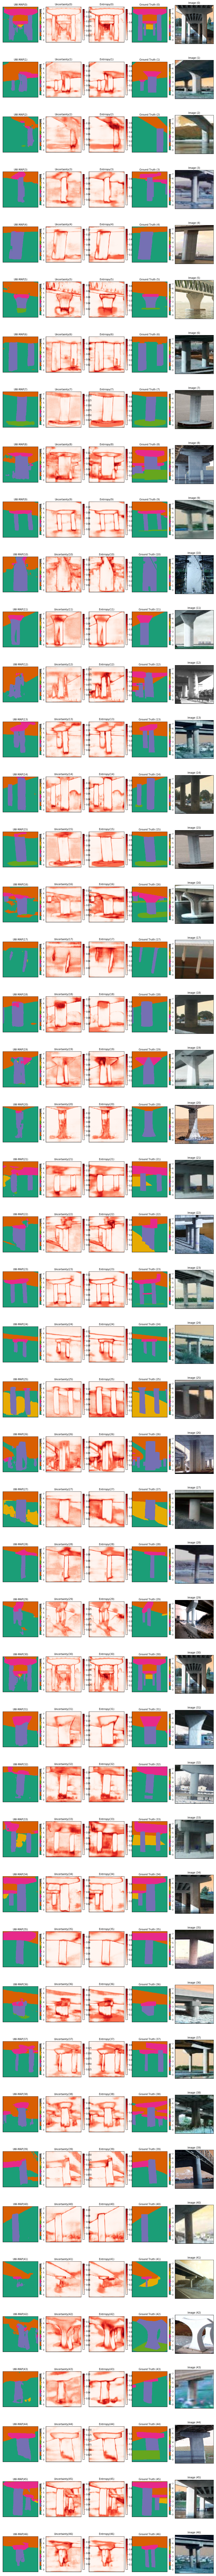

In [11]:
indc_plot=np.arange(0,47,1)

X_set=X_test[indc_plot,:,:,:]
Y_set=Y_test[indc_plot,:,:]
Set_indc=indc_plot
nSet=X_set.shape[0]
plt.rcParams["font.size"] = 8
cmap_id='Dark2'
cmap=plt.cm.Dark2

cmap_u=plt.cm.Reds

fig,axes=plt.subplots(nSet,2+3,figsize=(15,4*nSet))

plt.subplots_adjust(wspace=0.12, hspace=0.12)

mean_var=np.mean(SoftmaxStd_test,axis=-1)
for i in range(2+3):
    for j in range(nSet):
        axes[j,i].spines['top'].set_visible(1.2)
        axes[j,i].spines['right'].set_visible(1.2)
        axes[j,i].spines['bottom'].set_linewidth(1.2)
        axes[j,i].spines['left'].set_linewidth(1.2)
        axes[j,i].set_yticklabels([])
        axes[j,i].set_xticklabels([])
        axes[j,i].tick_params(bottom=False, left=False)
        
for j in range(nSet):
    XL_image_id=str(j)
    im_gt=axes[j,-2].imshow(Y_set[j,:,:],cmap=cmap,vmin=0,vmax=7)
    axes[j,-2].set_title('Ground Truth '+'('+XL_image_id+')')
    
    axes[j,-1].imshow(X_set[j,:,:,:])
    axes[j,-1].set_title('Image '+'('+XL_image_id+')')
    
    im_1=axes[j,1].imshow(mean_var[indc_plot[j],:,:],cmap=cmap_u)
    axes[j,1].set_title('Uncertainty'+'('+XL_image_id+')')
    
    im_2=axes[j,2].imshow(entropy_test[indc_plot[j],:,:],cmap=cmap_u)
    axes[j,2].set_title('Entrropy'+'('+XL_image_id+')')
    
    im_prd=axes[j,0].imshow(PRD_test[indc_plot[j],:,:],cmap=cmap,vmin=0,vmax=7)
    axes[j,0].set_title(model_specs+'('+XL_image_id+')')
    
    cax1=plt.colorbar(im_1,ax=axes[j,1],fraction=0.040, pad=0.04)
    cax2=plt.colorbar(im_2,ax=axes[j,2],fraction=0.040, pad=0.04)
    cax3=plt.colorbar(im_prd,ax=axes[j,0],fraction=0.040, pad=0.04)
    cax4=plt.colorbar(im_gt,ax=axes[j,-2],fraction=0.040, pad=0.04)
    # cax.set_ticks(np.arange(0, 17, 1))
    
# plt.tight_layout(pad=0.01, h_pad=0.01, w_pad=0.01)            

plot_save_name='BO-Test-Img-Select-Uncertainty'
fig.savefig(plot_save_name+str(cmap_id)+'.png',dpi=200, pad_inches=0.1,bbox_inches='tight')    
fig.savefig(plot_save_name+str(cmap_id)+'.svg',dpi=200, pad_inches=0.1,bbox_inches='tight')   

## Good

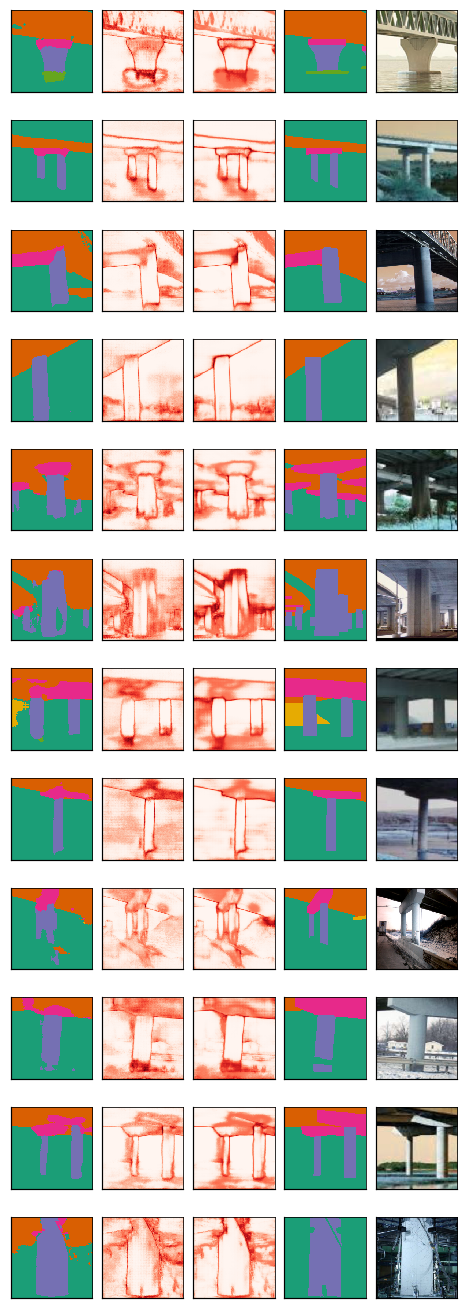

In [12]:
indc_plot=[5,24,39,40,38,26,21,28,29,32,37,10]

X_set=X_test[indc_plot,:,:,:]
Y_set=Y_test[indc_plot,:,:]
Set_indc=indc_plot
nSet=X_set.shape[0]
plt.rcParams["font.size"] = 8
cmap_id='Dark2'
cmap=plt.cm.Dark2

cmap_u=plt.cm.Reds

fig,axes=plt.subplots(nSet,2+3,figsize=(8,2*nSet))

plt.subplots_adjust(wspace=0.12, hspace=0.12)

mean_var=np.mean(SoftmaxStd_test,axis=-1)
for i in range(2+3):
    for j in range(nSet):
        axes[j,i].spines['top'].set_visible(1.2)
        axes[j,i].spines['right'].set_visible(1.2)
        axes[j,i].spines['bottom'].set_linewidth(1.2)
        axes[j,i].spines['left'].set_linewidth(1.2)
        axes[j,i].set_yticklabels([])
        axes[j,i].set_xticklabels([])
        axes[j,i].tick_params(bottom=False, left=False)
        
for j in range(nSet):
    XL_image_id=str(j)
    im_gt=axes[j,-2].imshow(Y_set[j,:,:],cmap=cmap,vmin=0,vmax=7)
   # axes[j,-2].set_title('Ground truth '+'('+XL_image_id+')')
    
    axes[j,-1].imshow(X_set[j,:,:,:])
   # axes[j,-1].set_title('Input image '+'('+XL_image_id+')')
    
    im_1=axes[j,1].imshow(mean_var[indc_plot[j],:,:],cmap=cmap_u)
  #  axes[j,1].set_title('MCSV'+'('+XL_image_id+')')
    
    im_2=axes[j,2].imshow(entropy_test[indc_plot[j],:,:],cmap=cmap_u)
  #  axes[j,2].set_title('Entrropy'+'('+XL_image_id+')')
    
    im_prd=axes[j,0].imshow(PRD_test[indc_plot[j],:,:],cmap=cmap,vmin=0,vmax=7)
  #  axes[j,0].set_title('Prediction'+'('+XL_image_id+')')
    
#     cax1=plt.colorbar(im_1,ax=axes[j,1],fraction=0.040, pad=0.04)
#     cax2=plt.colorbar(im_2,ax=axes[j,2],fraction=0.040, pad=0.04)
#     cax3=plt.colorbar(im_prd,ax=axes[j,0],fraction=0.040, pad=0.04)
#     cax4=plt.colorbar(im_gt,ax=axes[j,-2],fraction=0.040, pad=0.04)
    # cax.set_ticks(np.arange(0, 17, 1))
    
# plt.tight_layout(pad=0.01, h_pad=0.01, w_pad=0.01)            

plot_save_name='Selection'
fig.savefig(plot_save_name+str(cmap_id)+'.png',dpi=100, pad_inches=0.1,bbox_inches='tight')    
fig.savefig(plot_save_name+str(cmap_id)+'.svg',dpi=300, pad_inches=0.1,bbox_inches='tight')  

## Blend with Alpha

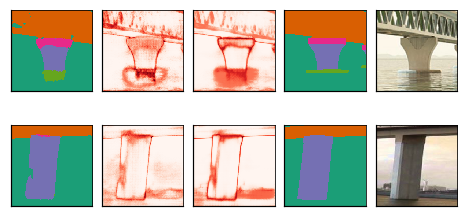

In [13]:
indc_plot=[5,4]

X_set=X_test[indc_plot,:,:,:]
Y_set=Y_test[indc_plot,:,:]
Set_indc=indc_plot
nSet=X_set.shape[0]
plt.rcParams["font.size"] = 8
cmap_id='Dark2'
cmap=plt.cm.Dark2

cmap_u=plt.cm.Reds

fig,axes=plt.subplots(nSet,2+3,figsize=(8,2*nSet))

plt.subplots_adjust(wspace=0.12, hspace=0.12)

mean_var=np.mean(SoftmaxStd_test,axis=-1)
for i in range(2+3):
    for j in range(nSet):
        axes[j,i].spines['top'].set_visible(1.2)
        axes[j,i].spines['right'].set_visible(1.2)
        axes[j,i].spines['bottom'].set_linewidth(1.2)
        axes[j,i].spines['left'].set_linewidth(1.2)
        axes[j,i].set_yticklabels([])
        axes[j,i].set_xticklabels([])
        axes[j,i].tick_params(bottom=False, left=False)
        
for j in range(nSet):
    XL_image_id=str(j)
    im_gt=axes[j,-2].imshow(Y_set[j,:,:],cmap=cmap,vmin=0,vmax=7)
   # axes[j,-2].set_title('Ground truth '+'('+XL_image_id+')')
    
    axes[j,-1].imshow(X_set[j,:,:,:])
   # axes[j,-1].set_title('Input image '+'('+XL_image_id+')')
    
    im_1=axes[j,1].imshow(mean_var[indc_plot[j],:,:],cmap=cmap_u)
  #  axes[j,1].set_title('MCSV'+'('+XL_image_id+')')
    
    im_2=axes[j,2].imshow(entropy_test[indc_plot[j],:,:],cmap=cmap_u)
  #  axes[j,2].set_title('Entrropy'+'('+XL_image_id+')')
    
    im_prd=axes[j,0].imshow(PRD_test[indc_plot[j],:,:],cmap=cmap,vmin=0,vmax=7)
  #  axes[j,0].set_title('Prediction'+'('+XL_image_id+')')
    
#     cax1=plt.colorbar(im_1,ax=axes[j,1],fraction=0.040, pad=0.04)
#     cax2=plt.colorbar(im_2,ax=axes[j,2],fraction=0.040, pad=0.04)
#     cax3=plt.colorbar(im_prd,ax=axes[j,0],fraction=0.040, pad=0.04)
#     cax4=plt.colorbar(im_gt,ax=axes[j,-2],fraction=0.040, pad=0.04)
    # cax.set_ticks(np.arange(0, 17, 1))
    
# plt.tight_layout(pad=0.01, h_pad=0.01, w_pad=0.01)            

plot_save_name='Selection'
fig.savefig(plot_save_name+str(cmap_id)+'.png',dpi=100, pad_inches=0.1,bbox_inches='tight')    
fig.savefig(plot_save_name+str(cmap_id)+'.svg',dpi=300, pad_inches=0.1,bbox_inches='tight')  

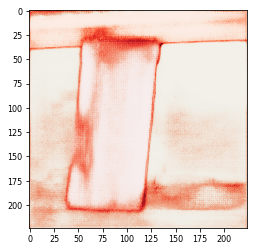

In [122]:
from PIL import Image
from matplotlib import cm

image_id=4

SegMask=Y_test[image_id,:,:]
Input=X_test[image_id,:,:,:]
MCSV=mean_var[image_id,:,:]

# a=np.uint8((Input*255).astype(int))
# b=np.uint8((MCSV/np.amax(MCSV)).astype(int))
# im1 = Image.fromarray(a)
# im2 = Image.fromarray(image2)

# plt.imshow(Input) 
plt.imshow(SegMask,cmap=cmap,vmin=0,vmax=7) 
#plt.savefig('Ground truth.png')
plt.imshow(MCSV,alpha=0.95,cmap='Reds')
# plt.savefig('MCSV.png')
# alphaBlended1 = Image.blend(im1, im2, alpha=.4)
# alphaBlended1.show()

# image1 = Image.open("./sky1.png")
# image2 = Image.open("./spaceship1.png")

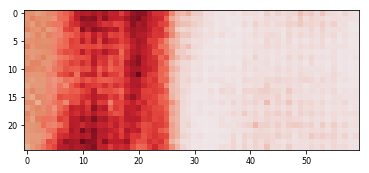

In [123]:
h_bot=125
h_top=150

w_bot=40
w_top=100

SegMask=Y_test[image_id,h_bot:h_top,w_bot:w_top]
Input=X_test[image_id,h_bot:h_top,w_bot:w_top,:]
MCSV=mean_var[image_id,h_bot:h_top,w_bot:w_top]


# plt.imshow(Input) 
plt.imshow(SegMask,cmap=cmap,vmin=0,vmax=7) 
#plt.savefig('Ground truth.png')
plt.imshow(MCSV,alpha=0.9,cmap='Reds')
# plt.savefig('MCSV.png')
# alphaBlended1 = Image.blend(im1, im2, alpha=.4)
# alphaBlended1.show()

# image1 = Image.open("./sky1.png")
# image2 = Image.open("./spaceship1.png")

In [50]:
np.amax(MCSV)

0.10337457

In [40]:
Input.shape

(224, 224, 3)

In [42]:
a=(Input*255).astype(int)

In [43]:
a

array([[[199, 194, 149],
        [150, 150, 104],
        [ 98, 101,  54],
        ...,
        [250, 244, 224],
        [250, 245, 224],
        [252, 247, 226]],

       [[189, 185, 140],
        [140, 140,  94],
        [ 90,  95,  48],
        ...,
        [245, 240, 221],
        [241, 237, 218],
        [241, 237, 218]],

       [[176, 172, 127],
        [127, 127,  81],
        [ 83,  87,  42],
        ...,
        [245, 241, 223],
        [244, 240, 222],
        [244, 242, 224]],

       ...,

       [[228, 224, 196],
        [227, 223, 195],
        [226, 222, 194],
        ...,
        [193, 196, 184],
        [199, 201, 189],
        [196, 198, 187]],

       [[226, 222, 194],
        [226, 222, 194],
        [227, 223, 195],
        ...,
        [172, 173, 157],
        [179, 180, 164],
        [178, 179, 163]],

       [[218, 214, 186],
        [220, 216, 188],
        [222, 218, 190],
        ...,
        [152, 155, 133],
        [162, 165, 143],
        [162, 165, 143]]